In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pickle

In [7]:
# --- ORENISTデータセットを読み込む ---
with open('ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file, encoding='latin1')

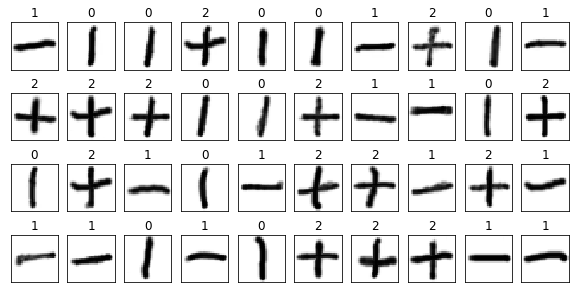

In [8]:
# --- サンプルデータ表示 ---
fig = plt.figure(figsize=(10,5))
for i in range(40):
    subplot = fig.add_subplot(4, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape(28,28), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

In [11]:
# --- フィルターを適用する ---
def edge_filter():
    filter0 = np.array(
            [[ 2, 1, 0,-1,-2],
             [ 3, 2, 0,-2,-3],
             [ 4, 3, 0,-3,-4],
             [ 3, 2, 0,-2,-3],
             [ 2, 1, 0,-1,-2]]) / 23.0
    filter1 = np.array(
            [[ 2, 3, 4, 3, 2],
             [ 1, 2, 3, 2, 1],
             [ 0, 0, 0, 0, 0],
             [-1,-2,-3,-2,-1],
             [-2,-3,-4,-3,-2]]) / 23.0
    
    filter_array = np.zeros([5,5,1,2]) # フィルターサイズ（縦横）×入力レイヤー数 (RGBなら3)×出力レイヤー数 (フィルターの数)
    filter_array[:,:,0,0] = filter0 # 実験的に今回はフィルターを指定
    filter_array[:,:,0,1] = filter1 # 実験的に今回はフィルターを指定

    return tf.constant(filter_array, dtype=tf.float32)

x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1]) # 画像の枚数×画像サイズ（縦×横）×レイヤー数の多次元リストでデータを与える, -1はデータ数に応じて調整するという意味

W_conv = edge_filter()
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME'))# 入力x_imageに対してフィルターW_convをかける, [1, dy, dx, 1]でdy, dxは縦横方向のピクセルの抽出数, SAMEはゼロパディング
h_conv_cutoff = tf.nn.relu(h_conv-0.2) # 0.2を引いてReluに代入することで，畳み込みフィルターで0.2以下になったところは強制的に0にする

h_pool =tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [12]:
# --- 最初の9個分の画像データに対して、畳み込みフィルターを適用した結果を計算する ---
sess = tf.Session()
sess.run(tf.initialize_all_variables())
filter_vals, conv_vals = sess.run([W_conv, h_conv_cutoff], feed_dict={x:images[:9]})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


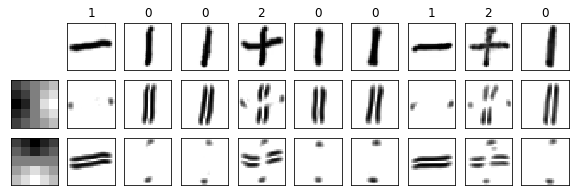

In [13]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')

v_max = np.max(conv_vals) # ピクセル値の最大値

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest') # 0番目のフィルター
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest') # 1番目のフィルター